Company Default Data

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
CompaniesData=pd.read_excel('D:/Excel Data/CompaniesData.xlsx')

In [3]:
CompaniesData.head()

,Num,Networth Next Year,Total assets,Net worth,Total income,Change in stock,Total expenses,Profit after tax,PBDITA,PBT,...,Debtors turnover,Finished goods turnover,WIP turnover,Raw material turnover,Shares outstanding,Equity face value,EPS,Adjusted EPS,Total liabilities,PE on BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


Fixing messy column names (containing spaces) for ease of use

In [4]:
CompaniesData.columns = CompaniesData.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('%', 'perc').str.replace('/', '_to_')

Checking top 5 rows again¶

In [5]:
CompaniesData.head()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.6,17512.3,7093.2,24965.2,235.8,23657.8,1543.2,2860.2,2417.2,...,3.85,200.55,21.78,7.71,42381675.0,10.0,35.52,7.10,17512.3,27.31
1,2,394.3,941.0,351.5,1527.4,42.7,1454.9,115.2,283.0,188.4,...,5.70,14.21,7.49,11.46,11550000.0,10.0,9.97,9.97,941.0,8.17
2,3,92.2,232.8,100.6,477.3,-5.2,478.7,-6.6,5.8,-6.6,...,5.07,9.24,0.23,NaN,8149090.0,10.0,-0.50,-0.50,232.8,-5.76
3,4,2.7,2.7,2.7,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.0,10.0,0.00,0.00,2.7,NaN
4,5,109.0,478.5,107.6,1580.5,-17.0,1558.0,5.5,31.0,6.3,...,9.46,12.68,7.90,17.03,619635.0,10.0,7.91,7.91,478.5,NaN


Now, let us check the number of rows (observations) and the number of columns (variables)

In [6]:
print('The number of rows (observations) is',CompaniesData.shape[0],'\n''The number of columns (variables) is',CompaniesData.shape[1])

The number of rows (observations) is 3541 
The number of columns (variables) is 52


Checking datatype of all columns

In [7]:
CompaniesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3541 entries, 0 to 3540
Data columns (total 52 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Num                                             3541 non-null   int64  
 1   Networth_Next_Year                              3541 non-null   float64
 2   Total_assets                                    3541 non-null   float64
 3   Net_worth                                       3541 non-null   float64
 4   Total_income                                    3343 non-null   float64
 5   Change_in_stock                                 3083 non-null   float64
 6   Total_expenses                                  3402 non-null   float64
 7   Profit_after_tax                                3410 non-null   float64
 8   PBDITA                                          3410 non-null   float64
 9   PBT                                      

Now, let us check the basic measures of descriptive statistics for the continuous variables

In [8]:
CompaniesData.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.000000,3541.000000,3.541000e+03,3541.000000,3.343000e+03,3083.000000,3.402000e+03,3410.00000,3410.000000,3410.000000,...,3213.000000,2801.000000,2901.000000,3180.000000,2.849000e+03,2849.000000,3541.000000,3541.000000,3.541000e+03,1347.000000
mean,1772.451567,1616.256199,3.443382e+03,1295.862214,4.582823e+03,41.489264,4.262931e+03,277.36044,578.056305,383.810088,...,17.041261,87.078725,27.930469,19.088399,2.206739e+07,-1333.698175,-220.316436,-221.512285,3.443382e+03,63.905687
std,1023.731393,17459.639673,3.097089e+04,13387.891867,5.568124e+04,440.573761,5.302869e+04,3064.40606,5653.770427,4117.069953,...,83.943754,598.545835,151.042868,376.340737,1.655193e+08,37500.729972,14261.946209,14261.923760,3.097089e+04,1433.809532
min,1.000000,-74265.600000,1.000000e-01,0.000000,0.000000e+00,-3029.400000,-1.000000e-01,-3908.30000,-440.700000,-3894.800000,...,0.000000,-0.090000,-0.180000,-2.000000,-2.147484e+09,-999998.900000,-843181.820000,-843181.820000,1.000000e-01,-1116.640000
25%,886.000000,31.700000,9.130000e+01,31.300000,1.064500e+02,-1.800000,9.582500e+01,0.50000,6.900000,0.700000,...,3.760000,8.200000,5.100000,2.990000,1.316250e+06,10.000000,0.000000,0.000000,9.130000e+01,3.275000
50%,1773.000000,116.300000,3.097000e+02,102.300000,4.449000e+02,1.600000,4.077000e+02,8.80000,35.400000,12.400000,...,6.320000,17.270000,9.760000,6.400000,4.672063e+06,10.000000,1.430000,1.180000,3.097000e+02,9.100000
75%,2658.000000,456.100000,1.098700e+03,377.300000,1.440900e+03,18.050000,1.359775e+03,52.27500,150.250000,71.975000,...,11.680000,40.350000,20.240000,11.845000,1.065197e+07,10.000000,9.620000,7.480000,1.098700e+03,17.790000
max,3545.000000,805773.400000,1.176509e+06,613151.600000,2.442828e+06,14185.500000,2.366035e+06,119439.10000,208576.500000,145292.600000,...,3135.200000,17947.600000,5651.400000,21092.000000,4.130401e+09,100000.000000,34522.530000,34522.530000,1.176509e+06,51002.740000


In [9]:
pd.options.display.float_format = '{:.2f}'.format   

CompaniesData.describe()

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
count,3541.00,3541.00,3541.00,3541.00,3343.00,3083.00,3402.00,3410.00,3410.00,3410.00,...,3213.00,2801.00,2901.00,3180.00,2849.00,2849.00,3541.00,3541.00,3541.00,1347.00
mean,1772.45,1616.26,3443.38,1295.86,4582.82,41.49,4262.93,277.36,578.06,383.81,...,17.04,87.08,27.93,19.09,22067387.54,-1333.70,-220.32,-221.51,3443.38,63.91
std,1023.73,17459.64,30970.89,13387.89,55681.24,440.57,53028.69,3064.41,5653.77,4117.07,...,83.94,598.55,151.04,376.34,165519303.66,37500.73,14261.95,14261.92,30970.89,1433.81
min,1.00,-74265.60,0.10,0.00,0.00,-3029.40,-0.10,-3908.30,-440.70,-3894.80,...,0.00,-0.09,-0.18,-2.00,-2147483647.00,-999998.90,-843181.82,-843181.82,0.10,-1116.64
25%,886.00,31.70,91.30,31.30,106.45,-1.80,95.83,0.50,6.90,0.70,...,3.76,8.20,5.10,2.99,1316250.00,10.00,0.00,0.00,91.30,3.28
50%,1773.00,116.30,309.70,102.30,444.90,1.60,407.70,8.80,35.40,12.40,...,6.32,17.27,9.76,6.40,4672063.00,10.00,1.43,1.18,309.70,9.10
75%,2658.00,456.10,1098.70,377.30,1440.90,18.05,1359.78,52.27,150.25,71.97,...,11.68,40.35,20.24,11.85,10651966.00,10.00,9.62,7.48,1098.70,17.79
max,3545.00,805773.40,1176509.20,613151.60,2442828.20,14185.50,2366035.30,119439.10,208576.50,145292.60,...,3135.20,17947.60,5651.40,21092.00,4130400545.00,100000.00,34522.53,34522.53,1176509.20,51002.74


Creating a binary target variable using 'Networth_Next_Year'

In [10]:
CompaniesData['default'] = np.where((CompaniesData['Networth_Next_Year'] > 0), 0, 1)

Checking top 10 rows

In [11]:
CompaniesData[['default','Networth_Next_Year']].head(10)

,default,Networth_Next_Year
0,0,8890.60
1,0,394.30
2,0,92.20
3,0,2.70
4,0,109.00
5,0,688.60
6,0,246.00
7,0,13.70
8,0,291.50
9,1,-7.30


What does variable 'default' look like?

In [12]:
CompaniesData['default'].value_counts()

default
0    3298
1     243
Name: count, dtype: int64

Checking proportion of default

In [13]:
CompaniesData['default'].value_counts(normalize = True)

default
0   0.93
1   0.07
Name: proportion, dtype: float64

Lets check for missing values in the dataset

In [14]:
CompaniesData.isnull().sum()

Num                                                  0
Networth_Next_Year                                   0
Total_assets                                         0
Net_worth                                            0
Total_income                                       198
Change_in_stock                                    458
Total_expenses                                     139
Profit_after_tax                                   131
PBDITA                                             131
PBT                                                131
Cash_profit                                        131
PBDITA_as_perc_of_total_income                      68
PBT_as_perc_of_total_income                         68
PAT_as_perc_of_total_income                         68
Cash_profit_as_perc_of_total_income                 68
PAT_as_perc_of_net_worth                             0
Sales                                              259
Income_from_financial_services                     935
Other_inco

In [15]:
CompaniesData.size

187673

In [16]:
CompaniesData.isnull().sum().sum()

18533

In [17]:
Company_X = CompaniesData.drop('default', axis = 1)
Company_Y = CompaniesData['default']

In [18]:
Company_X

,Num,Networth_Next_Year,Total_assets,Net_worth,Total_income,Change_in_stock,Total_expenses,Profit_after_tax,PBDITA,PBT,...,Debtors_turnover,Finished_goods_turnover,WIP_turnover,Raw_material_turnover,Shares_outstanding,Equity_face_value,EPS,Adjusted_EPS,Total_liabilities,PE_on_BSE
0,1,8890.60,17512.30,7093.20,24965.20,235.80,23657.80,1543.20,2860.20,2417.20,...,3.85,200.55,21.78,7.71,42381675.00,10.00,35.52,7.10,17512.30,27.31
1,2,394.30,941.00,351.50,1527.40,42.70,1454.90,115.20,283.00,188.40,...,5.70,14.21,7.49,11.46,11550000.00,10.00,9.97,9.97,941.00,8.17
2,3,92.20,232.80,100.60,477.30,-5.20,478.70,-6.60,5.80,-6.60,...,5.07,9.24,0.23,NaN,8149090.00,10.00,-0.50,-0.50,232.80,-5.76
3,4,2.70,2.70,2.70,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,0.00,52404.00,10.00,0.00,0.00,2.70,NaN
4,5,109.00,478.50,107.60,1580.50,-17.00,1558.00,5.50,31.00,6.30,...,9.46,12.68,7.90,17.03,619635.00,10.00,7.91,7.91,478.50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3536,3541,226.40,450.50,172.30,565.00,30.50,581.10,14.40,76.70,41.10,...,20.64,8.66,5.14,19.47,14904213.00,10.00,0.97,0.97,450.50,NaN
3537,3542,89.40,97.60,82.00,75.80,-4.00,66.50,5.30,11.10,6.20,...,14.21,5.13,4.17,4.83,3362800.00,10.00,1.61,1.61,97.60,2.49
3538,3543,246.20,902.90,209.10,1005.10,5.60,966.50,44.20,120.30,70.00,...,3.76,33.03,11.68,4.63,3000000.00,10.00,13.10,13.10,902.90,12.62
3539,3544,146.90,177.00,137.20,371.00,3.90,348.90,26.00,50.50,40.80,...,13.75,49.00,47.03,17.42,4422346.00,10.00,6.06,6.06,177.00,4.07


Let's check the number of outliers per column

In [19]:
Q1 = Company_X.quantile(0.25)
Q3 = Company_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [20]:
((Company_X > UL) | (Company_X < LL)).sum()

Num                                                 0
Networth_Next_Year                                506
Total_assets                                      484
Net_worth                                         499
Total_income                                      427
Change_in_stock                                   621
Total_expenses                                    432
Profit_after_tax                                  577
PBDITA                                            483
PBT                                               576
Cash_profit                                       515
PBDITA_as_perc_of_total_income                    287
PBT_as_perc_of_total_income                       453
PAT_as_perc_of_total_income                       502
Cash_profit_as_perc_of_total_income               353
PAT_as_perc_of_net_worth                          344
Sales                                             418
Income_from_financial_services                    432
Other_income                

In [21]:
Company_X[((Company_X > UL) | (Company_X < LL))]= np.nan

In [22]:
Company_X.isnull().sum()

Num                                                  0
Networth_Next_Year                                 506
Total_assets                                       484
Net_worth                                          499
Total_income                                       625
Change_in_stock                                   1079
Total_expenses                                     571
Profit_after_tax                                   708
PBDITA                                             614
PBT                                                707
Cash_profit                                        646
PBDITA_as_perc_of_total_income                     355
PBT_as_perc_of_total_income                        521
PAT_as_perc_of_total_income                        570
Cash_profit_as_perc_of_total_income                421
PAT_as_perc_of_net_worth                           344
Sales                                              677
Income_from_financial_services                    1367
Other_inco

In [23]:
Company_X.isnull().sum().sum()

39981

In [24]:
Company_X = Company_X.drop(['Num', 'Networth_Next_Year', 'Equity_face_value'], axis = 1)

In [25]:
Company_X.shape

(3541, 49)

In [26]:
Company_sub1 = pd.concat([Company_X, Company_Y], axis =1 )

Let's visually inspect the missing values in our data

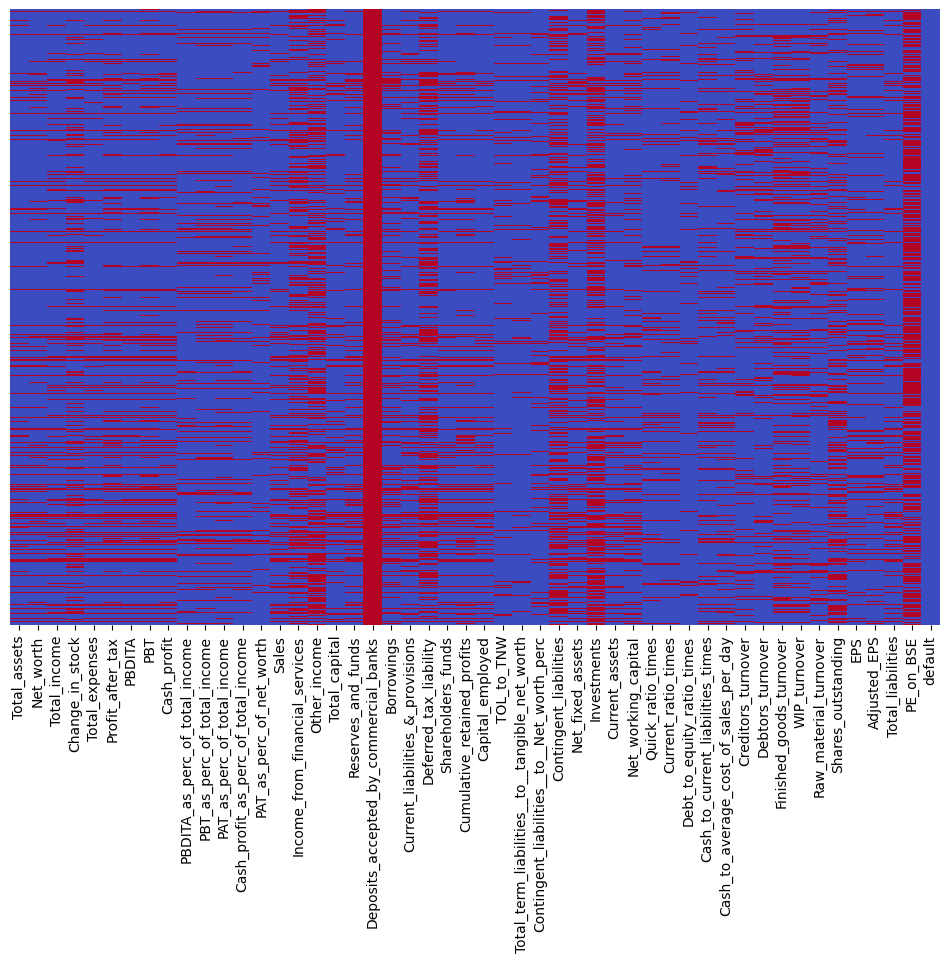

In [27]:
plt.figure(figsize = (12,8))
sns.heatmap(Company_sub1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

We should inspect total missing values by each row.

In [28]:
Company_sub1.isnull().sum(axis = 1)

0       30
1        3
2        3
3       23
4        3
        ..
3536     5
3537     7
3538     2
3539     7
3540    22
Length: 3541, dtype: int64

In [29]:
Company_sub1_temp = Company_sub1[Company_sub1.isnull().sum(axis = 1) <= 5]

In [30]:
Company_sub1_temp.shape

(1082, 50)

In [31]:
Company_sub1_temp['default'].value_counts()

default
0    1063
1      19
Name: count, dtype: int64

In [32]:
19/243

0.07818930041152264

If we consider availability of features for deciding the observations to be considered, we will end up losing more than 90% of the actual defaulters.

In [33]:
Company_sub1['default'].value_counts()

default
0    3298
1     243
Name: count, dtype: int64

In [34]:
Company_sub1.isnull().sum().sort_values(ascending = False)/Company_sub1.index.size

Deposits_accepted_by_commercial_banks            1.00
PE_on_BSE                                        0.68
Investments                                      0.51
Other_income                                     0.46
Contingent_liabilities                           0.43
Deferred_tax_liability                           0.42
Income_from_financial_services                   0.39
Shares_outstanding                               0.31
Change_in_stock                                  0.30
Finished_goods_turnover                          0.30
WIP_turnover                                     0.27
Borrowings                                       0.23
Profit_after_tax                                 0.20
PBT                                              0.20
Net_working_capital                              0.20
Creditors_turnover                               0.20
Sales                                            0.19
Debtors_turnover                                 0.19
Cash_profit                 

Dropping columns with more than 30% missing values

In [35]:
Company_sub2 = Company_sub1.drop(['Deposits_accepted_by_commercial_banks', 'PE_on_BSE', 
                             'Investments', 'Other_income', 'Contingent_liabilities', 
                             'Deferred_tax_liability', 'Income_from_financial_services',
                                  'Shares_outstanding'],
                           axis = 1)

In [36]:
Company_sub2.shape

(3541, 42)

Segregate the predictors and response

In [37]:
predictors = Company_sub2.drop('default', axis = 1)
response = Company_sub2['default']

Scale the predictors

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_predictors = pd.DataFrame(scaler.fit_transform(predictors), columns = predictors.columns)

In [39]:
Company_sub3 = pd.concat([scaled_predictors, response], axis = 1)

Imputing the remaining missing values

In [40]:
from sklearn.impute import KNNImputer

In [41]:
imputer = KNNImputer(n_neighbors=10)

In [42]:
Company_imputed = pd.DataFrame(imputer.fit_transform(Company_sub3), columns = Company_sub3.columns)

In [43]:
Company_imputed.isnull().sum()

Total_assets                                      0
Net_worth                                         0
Total_income                                      0
Change_in_stock                                   0
Total_expenses                                    0
Profit_after_tax                                  0
PBDITA                                            0
PBT                                               0
Cash_profit                                       0
PBDITA_as_perc_of_total_income                    0
PBT_as_perc_of_total_income                       0
PAT_as_perc_of_total_income                       0
Cash_profit_as_perc_of_total_income               0
PAT_as_perc_of_net_worth                          0
Sales                                             0
Total_capital                                     0
Reserves_and_funds                                0
Borrowings                                        0
Current_liabilities_&_provisions                  0
Shareholders

Inspect possible correlations between independent variables

<Axes: >

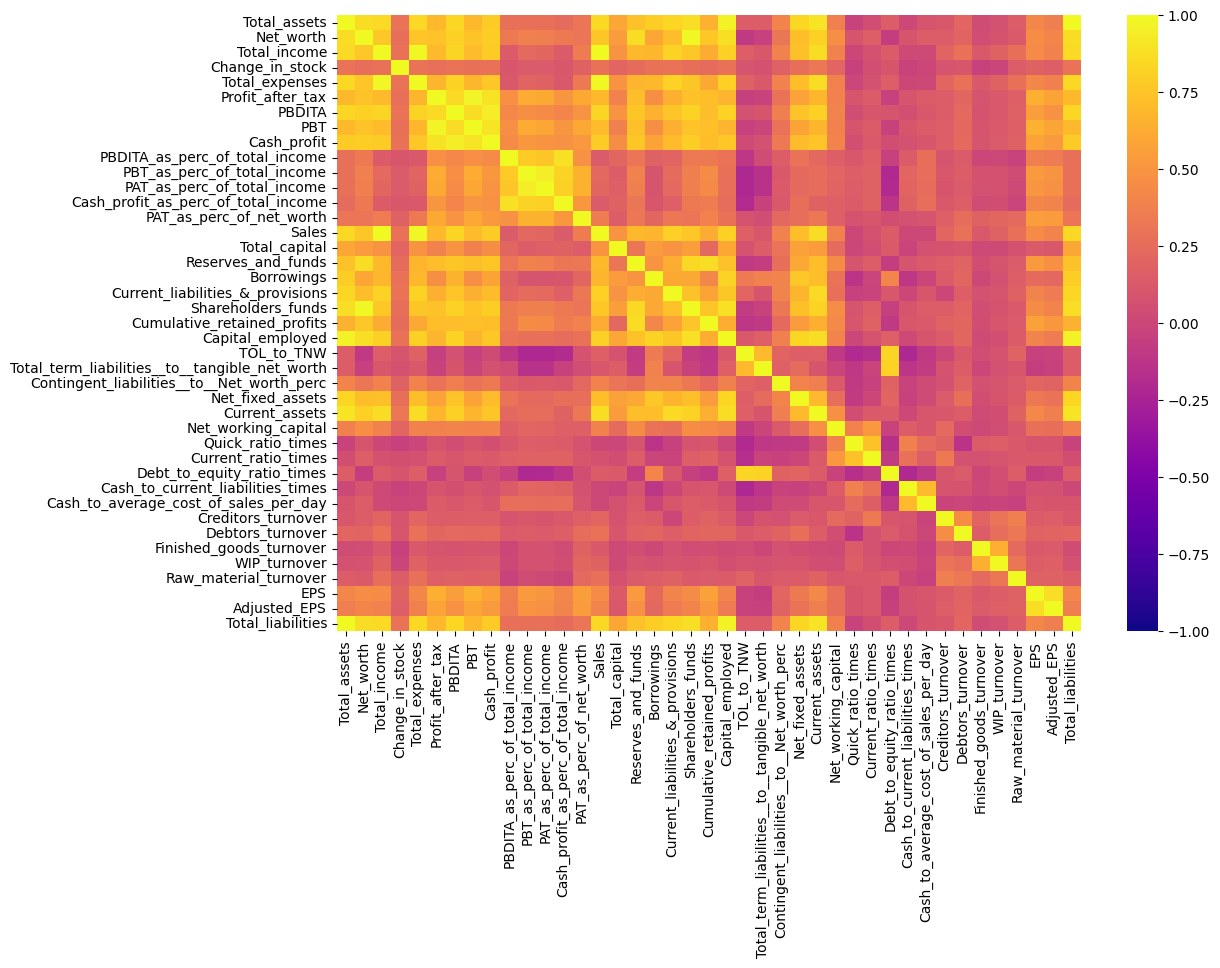

In [44]:
plt.figure(figsize = (12,8))
cor_matrix = Company_imputed.drop('default', axis = 1).corr()
sns.heatmap(cor_matrix, cmap = 'plasma', vmin = -1, vmax= 1)

In [45]:
predictors = Company_imputed.drop('default', axis = 1)
response = Company_imputed['default']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

Splitting the data into train and test sets

In [47]:
X_train, X_test, y_train, y_test = train_test_split(predictors, response, 
                                                    test_size = 0.3, random_state = 2)

For modeling we will use Logistic Regression with recursive feature elimination

In [48]:
LogR = LogisticRegression()

In [49]:
selector = RFE(estimator = LogR, n_features_to_select=15, step=1)

In [50]:
selector = selector.fit(X_train, y_train)

In [51]:
selector.n_features_

15

In [52]:
selector.ranking_

array([11, 10,  1,  1,  1, 18,  1, 19, 17,  1, 21,  1,  8,  4,  1, 14,  3,
       27, 24,  1,  1,  1, 15,  7, 20,  1,  1,  1, 25, 12,  6, 16, 22,  1,
       23,  5, 26,  9,  1, 13,  2])

In [53]:
df = pd.DataFrame({'Feature': scaled_predictors.columns, 'Rank': selector.ranking_})
df[df['Rank'] == 1]

,Feature,Rank
2,Total_income,1
3,Change_in_stock,1
4,Total_expenses,1
6,PBDITA,1
9,PBDITA_as_perc_of_total_income,1
11,PAT_as_perc_of_total_income,1
14,Sales,1
19,Shareholders_funds,1
20,Cumulative_retained_profits,1
21,Capital_employed,1


Validating the model on train and test set

In [54]:
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
pred_train = selector.predict(X_train)
pred_test = selector.predict(X_test)

In [56]:
print(confusion_matrix(y_train, pred_train))

[[2287   16]
 [ 130   45]]


In [57]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      2303
         1.0       0.74      0.26      0.38       175

    accuracy                           0.94      2478
   macro avg       0.84      0.63      0.68      2478
weighted avg       0.93      0.94      0.93      2478



In [58]:
print(confusion_matrix(y_test, pred_test))

[[977  18]
 [ 52  16]]


In [59]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97       995
         1.0       0.47      0.24      0.31        68

    accuracy                           0.93      1063
   macro avg       0.71      0.61      0.64      1063
weighted avg       0.92      0.93      0.92      1063



We see poor recall score for both train and test

Since only 7% of the total data had defaults, we will now try to balance the data before fiting the model.

In [60]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [61]:
selector_smote = selector.fit(X_res, y_res)

In [62]:
selector_smote.n_features_

15

In [63]:
pred_train_smote = selector_smote.predict(X_res)
pred_test_smote = selector_smote.predict(X_test)

In [64]:
print(classification_report(y_res, pred_train_smote))

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.86      2303
         1.0       0.84      0.90      0.87      2303

    accuracy                           0.86      4606
   macro avg       0.86      0.86      0.86      4606
weighted avg       0.86      0.86      0.86      4606

